## Playing with sampling and the Central Limit Theorem

Begin with imports:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

Let's create a population that isn't normally distributed we will concatenate several normal distributions to do so:

In [3]:
d1 = np.random.normal(loc=-6.4, scale=1.2, size = 40000)
d2 = np.random.normal(loc=4, scale=10, size = 16000)
d3 = np.random.normal(loc=22, scale=8, size = 72000)

population = np.concatenate([d1,d2,d3])
pop = pd.DataFrame(data=population, columns=['population'])
pop.head()

,population
0,-6.484716
1,-8.250709
2,-3.997110
3,-7.131546
4,-7.946361


## Make a histogram. Play around with bin size

Hint: there are multiple ways to do this. Try numpy.histogram or the pandas method hist.

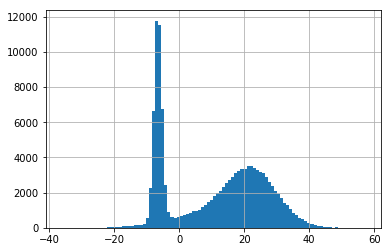

In [4]:
pop['population'].hist(bins=100)

Extra: Try displaying the data using an alternate visualization technique, a violin plot. Seaborn has a built-in method that is useful for this.

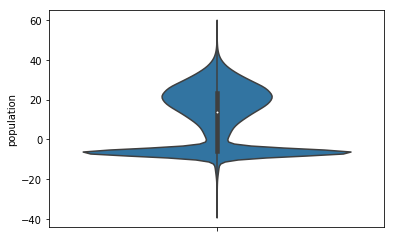

In [5]:
import seaborn as sns
ax = sns.violinplot(y='population',data=pop)

## Make a kernel density estimate of the population distribution

Hint: pandas.DataFrame.plot.kde

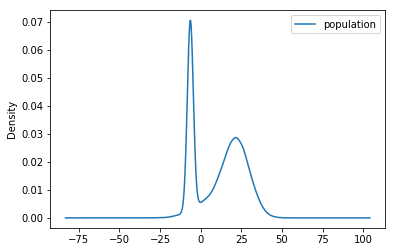

In [6]:
pop.plot.kde()

## Compute the mean of the population

In [7]:
pop['population'].mean()

10.859860909522869

## Computer the standard deviation of the population

In [8]:
pop['population'].std()

14.765603795969788

## We have described our population. Now let's draw a sample of size n and look at the distrubtion of our sample mean and s.d.

Write a function that samples the pop dataframe with an argument n that is the number of samples to take. Sample without replacement.

In [9]:
def draw_sample(pop, n):
    data = np.random.choice(pop,size=n, replace=False)
    sample = pd.DataFrame(data=data, columns=['population_sample'])
    return sample

In [10]:
draw_sample(pop['population'], 100)

,population_sample
0,21.274683
1,-6.854597
2,-6.762182
3,22.603230
4,6.040474
5,19.404725
6,-6.497700
7,-5.841078
8,15.893204
9,26.762454


## Now we want to draw repeated samples of size *n* from the population

Create another function that calls the first `samples` times. Have `samples` be an argument to the function along with n which is the argument to the first function. For each sample, append the mean and the standard deviation of the sample to two separate lists and return them.

Hint: use a loop with    range(samples) iterations. To create an empty list at the start of a function, try something like:

    def repeat_samples(samples, n):  
      means = []  
      sds = []  
      ...  
      return (means, sds)
    
then use the append method to append each mean and sd value to the end of each respective list.

In [11]:
def repeat_samples(samples, n):
    means = [] 
    sds = []
    
    for i in range(samples):
        sample = draw_sample(pop['population'],n)
        means.append(sample['population_sample'].mean)
        sds.append(sample['population_sample'].std)
    return (means, sds)

In [12]:
means, sds = repeat_samples(40,30)

In [13]:
len(means)

40

## Almost there!

Now make a function with two arguments `samples` and `n` that takes the return values from the last function and
* converts the lists to a single dataframe
* plots two histograms of the columns (mean, sd)
* prints out the mean and sd of the columns

Hint: to get a multi-valued return into new variables, try this:

    means, sds = repeat_samples(samples, n)
    df = pd.DataFrame(data={'means: means, 'sds': sds})

In [14]:
def repeat_samples(pop, samples, n):
   means = []
   sds = []

   for i in range(samples):
       sample = draw_sample(pop, n)
       means.append(sample['sample'].mean())
       sds.append(sample['sample'].std())

   return (means, sds)

In [15]:
def describe_sample(pop, samples, n):
   means, sds = repeat_samples(pop, samples, n)
   df = pd.DataFrame(data={'means': means, 'sds': sds})

   df.hist(bins=100)
   print('Mean: {}'.format(np.round(df['means'].mean(), 2)))
   print('Std Dev: {}'.format(np.round(df['sds'].mean(), 2)))

   return df

In [ ]:
df = describe_sample()

## Run your final function several times with varying values of samples and n

How did your result begin to converge on the population mean and sd?

## Bootstrapping your data: Finding confidence intervals

Statisticians take advantage of the central limit theorem as a method of establishing confidence intervals. Create a function that finds the nth and (100-n)th percentiles of the distribution of means found with describe_sample.